In [11]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

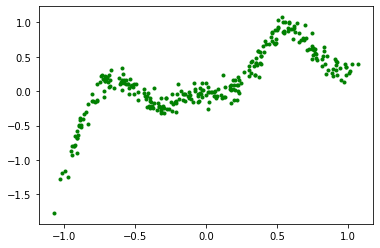

In [12]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Find best split with gradient descent -- scale error around break point with gaussian

In [44]:
# optim = tnn.SGD()
# optim = tnn.Adam(0.001, 0.5, 0.999)
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)

# optim = tnn.Adam(0.01)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
line0.weights *= 0
line1.weights *= 0

gaussian = tnn.Gaussian()

In [45]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
    
    mask0 = lout>0
    mask1 = ~mask0    
    
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    ##########11111111111
#     dxl = linear.backward(dy*err_scaler)#*0.25)
#     dx0 = line0.backward(dl0)
#     dx1 = line1.backward(dl1)
#     dx = dxl + dx0  + dx1
    ##########11111111111
    ##########22222222222
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    dxl = linear.backward(dy+dy*err_scaler)
    
#     dxl = linear.backward((dx0+dx1).mean(axis=1, keepdims=True)*err_scaler)#*0.25)
    
#     dx = dxl + dx0  + dx1
    
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.2198209965663875


100 Error =  0.08975710070874915


200 Error =  0.08974073305675738


300 Error =  0.08974073255336484


400 Error =  0.08974073255335896


500 Error =  0.08974073255335896


600 Error =  0.09364421603265981


700 Error =  0.0858989885178278


800 Error =  0.08025309567457094


900 Error =  0.07854636763222947


1000 Error =  0.07617926357480663


1100 Error =  0.07485831488938267


1200 Error =  0.07429756364743999


1300 Error =  0.07373446306352678


1400 Error =  0.07318200200222745


1500 Error =  0.07263125716093127


1600 Error =  0.07208221863855738


1700 Error =  0.07185177066551711


1800 Error =  0.07140773961434753


1900 Error =  0.07054995008530249


2000 Error =  0.06463944678545254


2100 Error =  0.43869331929598426


2200 Error =  0.08974164861314174


2300 Error =  0.08974073282557264


2400 Error =  0.08974073255336404


2500 Error =  0.08974073255335897


2600 Error =  0.08974073255335896


2700 Error =  0.08974073255335896


2800 E

TclError: invalid command name "pyimage215"

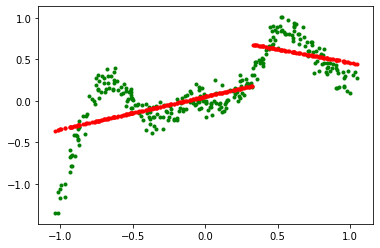

In [33]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [34]:
linear.weights, linear.bias

(array([[3.89335881]]), array([-1.26321376]))

## Sigmoid based,, it has gaussian gradient scaling

In [13]:
# optim = tnn.SGD()
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)

# optim = tnn.Adam(0.01)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
line0.weights *= 0
line1.weights *= 0

sigmoid = tnn.Sigmoid()

In [14]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
#     dxl = linear.backward(sigmoid.backward(dy))#/0.25)
#     dx0 = line0.backward(dl0)
#     dx1 = line1.backward(dl1)
#     dx = dxl + dx0  + dx1
#     ##########22222222222
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    dxl = linear.backward(sigmoid.backward((dx0+dx1).mean(axis=1, keepdims=True)*err_scaler))
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.20573669712547252


100 Error =  0.07676340151956225


200 Error =  0.07244702657159924


300 Error =  0.06823415284187773


400 Error =  0.07294213265878012


500 Error =  0.08802538453543644


600 Error =  0.06967458426206344


700 Error =  0.07058484941013514


800 Error =  0.08643539400396441


900 Error =  0.06881772681348196


1000 Error =  0.07822940212607449


1100 Error =  0.07563339095861599


1200 Error =  0.06727169824131332


1300 Error =  0.08690117903453087


1400 Error =  0.0687064515040196


1500 Error =  0.08730834675942889


1600 Error =  0.07263877228043893


1700 Error =  0.07543218688989246


1800 Error =  0.07574660008176133


1900 Error =  0.07049956956985269


2000 Error =  0.0772049469797046


2100 Error =  0.06994702815027543


2200 Error =  0.07818321420362918


2300 Error =  0.06918557409512202


2400 Error =  0.07810894535196924


2500 Error =  0.07049566632227566


2600 Error =  0.07642187045607608


2700 Error =  0.07417259115361509


2800 E

TclError: invalid command name "pyimage74"

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')
plt.show()
print(error)

In [ ]:
linear.weights, linear.bias

## Greedy best split

In [ ]:
splits = np.linspace(-1, 1, num=5000)

In [ ]:
def linear_regression(x_, y_):
#     xx_ = np.concatenate([xx, np.ones_like(xx)], axis=1)
#     mc = nalg.pinv(xx_)@yy

    x__ = np.vstack([x_, np.ones_like(x_)]).T
    mc = np.linalg.pinv(x__)@y_
    return mc

In [ ]:
def measure_split(split):
    mask = xx<split
    x1 = xx[mask]
    x2 = xx[~mask]
    y1 = yy[mask]
    y2 = yy[~mask]
    
    if np.count_nonzero(mask) == 0 or np.count_nonzero(~mask) == 0:
        out, error = np.zeros_like(yy), 9e9
        return out, error
    
    out = np.empty_like(yy)
    mc1 = linear_regression(x1, y1)
    mc2 = linear_regression(x2, y2)
    out[mask] = x1*mc1[0]+ mc1[1]
    out[~mask] = x2*mc2[0]+ mc2[1]
    
    error = ((out-yy)**2).mean()
    
    return out, error

In [ ]:
best_out = None
best_split = None
best_error = 9e9
for split in splits:
    out, error = measure_split(split)
    if error<best_error:
        best_error = error
        best_split = split
        best_out = out

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, best_out.reshape(-1), color='r', marker='.')
plt.show()
print(best_error)

In [ ]:
best_error

## Comparision with Double Relu (Continuous)

In [ ]:
optim = tnn.Adam(0.001)

net = tnn.AutoForm(new_layers=True)
l1 = tnn.LinearLayer(1,1,optimizer=optim)
l2 = tnn.DoubleReluLinearLayer(1,1, optimizer=optim)

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout-yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')
plt.show()
print(error)